In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading & Understanding the Data

In [41]:
df = pd.read_csv('../data/raw/AmesHousing.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (2930, 82)


In [42]:
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Basic Information

In [43]:
print("list of column names:", df.columns.to_list())
print("\ndata types:\n", df.dtypes)

list of column names: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pav

Total number of rows and columns

In [44]:
print("total number of rows ", df.shape[0])
print("total number of columns ", df.shape[1])

total number of rows  2930
total number of columns  82


In [45]:
# null check for missing values
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Summarize the data

In [46]:
df.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


Identifying the categorical and numerical data

In [47]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")


Categorical columns (43): ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

Numerical columns (39): ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Be

Target Value Analysis

In [48]:
# checking for target variable
df['SalePrice'].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


Target variable distribution:


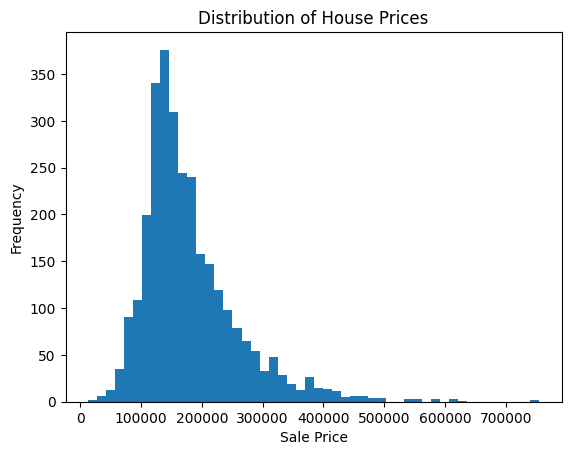

In [49]:
print(f"\nTarget variable distribution:")
plt.hist(df['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

# inference for target variable
1. sale price columns is the target variable
2. the graph is right skewed - need to add log transform to make the distribution normal
3. outliers exists long tail towards the left - some houses have extreme high prices
4. mean of the prices is approx $180k


## Data Cleaning

# Imputing & understanding missing values in columns

In [50]:
print("Total number of missing values in the dataset", df.isnull().sum().sum())
print("ascensing order of missing values in each column:\n", df.isnull().sum().sort_values(ascending=False))
print("Number of columns with no missing values:", df.isnull().sum().value_counts().get(0, 0))

# finding the top 10 columns with largest missing values
top_10_missing = df.isnull().sum().nlargest(10)
print("\nTop 10 columns with the most missing values:\n", top_10_missing)

Total number of missing values in the dataset 15749
ascensing order of missing values in each column:
 Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64
Number of columns with no missing values: 55

Top 10 columns with the most missing values:
 Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
dtype: int64


# Inference for missing values 
Pool QC 99.556314
Misc Feature 96.382253
Alley 93.242321
Fence 80.477816
Mas Vnr Type 60.580205
These are too much missing values (>>60%) and if we impute them then , Imputation becomes unreliable because there’s too little real data

In [51]:
# Step 1: COMPREHENSIVE MISSING DATA ANALYSIS FOR ALL 82 COLUMNS
print("="*100)
print("COMPREHENSIVE MISSING DATA ANALYSIS - ALL COLUMNS")
print("="*100)

# Calculate missing percentages for all columns
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df)) * 100,
    'Data_Type': df.dtypes.values
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

# Categorize columns by missing percentage
missing_data['Category'] = pd.cut(missing_data['Missing_Percentage'], 
                                  bins=[0, 5, 30, 60, 100],
                                  labels=['Keep (< 5%)', 'Impute (5-30%)', 'Investigate (30-60%)', 'High Risk (> 60%)'])

print("\n📊 SUMMARY OF MISSING DATA DISTRIBUTION:")
print("-" * 100)
print(f"Total columns: {len(df.columns)}")
print(f"Columns with NO missing data: {(missing_data['Missing_Percentage'] == 0).sum()}")
print(f"Columns with < 5% missing: {(missing_data['Missing_Percentage'] < 5).sum()}")
print(f"Columns with 5-30% missing: {((missing_data['Missing_Percentage'] >= 5) & (missing_data['Missing_Percentage'] < 30)).sum()}")
print(f"Columns with 30-60% missing: {((missing_data['Missing_Percentage'] >= 30) & (missing_data['Missing_Percentage'] < 60)).sum()}")
print(f"Columns with > 60% missing: {(missing_data['Missing_Percentage'] > 60).sum()}")

print("\n\n🔴 HIGH-RISK COLUMNS (> 60% MISSING) - DECISION REQUIRED:")
print("-" * 100)
high_risk = missing_data[missing_data['Missing_Percentage'] > 60]
print(high_risk.to_string())

print("\n\n🟡 BORDERLINE COLUMNS (30-60% MISSING) - INVESTIGATE FIRST:")
print("-" * 100)
borderline = missing_data[(missing_data['Missing_Percentage'] >= 30) & (missing_data['Missing_Percentage'] < 60)]
print(borderline.to_string())

print("\n\n🟢 GOOD COLUMNS (< 30% MISSING) - SAFE TO IMPUTE:")
print("-" * 100)
safe = missing_data[missing_data['Missing_Percentage'] < 30]
print(f"Count: {len(safe)} columns")
print(safe[['Column', 'Missing_Count', 'Missing_Percentage', 'Data_Type']].head(15).to_string())

COMPREHENSIVE MISSING DATA ANALYSIS - ALL COLUMNS

📊 SUMMARY OF MISSING DATA DISTRIBUTION:
----------------------------------------------------------------------------------------------------
Total columns: 82
Columns with NO missing data: 55
Columns with < 5% missing: 70
Columns with 5-30% missing: 6
Columns with 30-60% missing: 1
Columns with > 60% missing: 5


🔴 HIGH-RISK COLUMNS (> 60% MISSING) - DECISION REQUIRED:
----------------------------------------------------------------------------------------------------
          Column  Missing_Count  Missing_Percentage Data_Type           Category
73       Pool QC           2917           99.556314    object  High Risk (> 60%)
75  Misc Feature           2824           96.382253    object  High Risk (> 60%)
7          Alley           2732           93.242321    object  High Risk (> 60%)
74         Fence           2358           80.477816    object  High Risk (> 60%)
26  Mas Vnr Type           1775           60.580205    object  High Ris

1. Dropping columns with missing values > 60% that are random missing values
2. Dropping columns that are near constant - having same value for all the rows

In [52]:
df.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [53]:
# checking for categorical columns with near constant values
for col in categorical_cols:
    value_count = df[col].value_counts(normalize=True)
    top_col_values = value_count.iloc[0]
    print(col,"------->", top_col_values)

MS Zoning -------> 0.7757679180887372
Street -------> 0.9959044368600682
Alley -------> 0.6060606060606061
Lot Shape -------> 0.6344709897610922
Land Contour -------> 0.8986348122866894
Utilities -------> 0.9989761092150171
Lot Config -------> 0.7303754266211604
Land Slope -------> 0.951877133105802
Neighborhood -------> 0.15119453924914675
Condition 1 -------> 0.8607508532423208
Condition 2 -------> 0.9897610921501706
Bldg Type -------> 0.8276450511945392
House Style -------> 0.5054607508532423
Roof Style -------> 0.7921501706484642
Roof Matl -------> 0.9853242320819112
Exterior 1st -------> 0.35017064846416385
Exterior 2nd -------> 0.3464163822525597
Mas Vnr Type -------> 0.7619047619047619
Exter Qual -------> 0.6139931740614335
Exter Cond -------> 0.8699658703071672
Foundation -------> 0.447098976109215
Bsmt Qual -------> 0.45017543859649123
Bsmt Cond -------> 0.9178947368421052
Bsmt Exposure -------> 0.6694766420793818
BsmtFin Type 1 -------> 0.30140350877192984
BsmtFin Type 2 ----

# inference from the list of near constants 
Street	---> 0.996 ---->	 No variance
Utilities ---->	0.999 ---->	 Almost all same
Condition 2	----> 0.989	---> Rare secondary condition
Roof Matl	-----> 0.985 ---> Almost always same
Heating	---> 0.984	--> Almost always GasA

These fail all 3 rules → we can DROP.

In [54]:
# target variable relation with categorical columns
for col in categorical_cols:
    target_relation_data = df.groupby(col)['SalePrice'].median()
    print(f"\nMedian SalePrice by {col}:\n", target_relation_data)


Median SalePrice by MS Zoning:
 MS Zoning
A (agr)     47300.0
C (all)     78000.0
FV         209000.0
I (all)     80312.5
RH         140000.0
RL         172000.0
RM         120750.0
Name: SalePrice, dtype: float64

Median SalePrice by Street:
 Street
Grvl     87425.0
Pave    160375.0
Name: SalePrice, dtype: float64

Median SalePrice by Alley:
 Alley
Grvl    121000.0
Pave    172700.0
Name: SalePrice, dtype: float64

Median SalePrice by Lot Shape:
 Lot Shape
IR1    190000.0
IR2    213000.0
IR3    213000.0
Reg    145000.0
Name: SalePrice, dtype: float64

Median SalePrice by Land Contour:
 Land Contour
Bnk    136500.0
HLS    232606.5
Low    187750.0
Lvl    160000.0
Name: SalePrice, dtype: float64

Median SalePrice by Utilities:
 Utilities
AllPub    160000.0
NoSeWa    137500.0
NoSewr     86312.5
Name: SalePrice, dtype: float64

Median SalePrice by Lot Config:
 Lot Config
Corner     160000.0
CulDSac    206750.0
FR2        160500.0
FR3        184450.0
Inside     158000.0
Name: SalePrice, dty

# inference - after target relationship with categorical column 
Based on output:
    MS Zoning
    Neighborhood (VERY strong)
    Exter Qual / Kitchen Qual / Bsmt Qual
    Central Air
    Garage Finish / Type
    Sale Condition
    Sale Type
    Fireplace Qu

These are very important columns that we affect the target column.
Near-constant categorical features are retained because meaningful target separation was observed.

# Overall summary of eda for categorical columns 
1. Columns to DROP (definitive)
    These have >60% missing values and are structurally sparse:
        Pool QC (~99.5% missing)
        Misc Feature (~96% missing)
        Alley (~93% missing)
        Fence (~80% missing)
        Mas Vnr Type (~60.6% missing)
    Reason - 
        Missingness is too high to impute meaningfully
        Sparse presence introduces noise
        Sample size is unreliable
2. We keep other columns even if they are near constant columns like 
            Street
            Utilities etc
        Reason - 
            Near-constant columns still have meaningful target separation
            The SalePrice(target column) has differnec in median value for the different categories present in these columns, so we don't drop them.


In [55]:
# dropping the columns
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum()/ len(df)) *100
print(missing_percentage[missing_percentage > 60])
# Filter columns with missing values > 60%
cols_missing_above_60 = missing_percentage[missing_percentage > 60].sort_values(ascending=False)
print("\nColumns with more than 60% missing values:\n", cols_missing_above_60)
cols_to_drop = cols_missing_above_60.index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

Alley           93.242321
Mas Vnr Type    60.580205
Pool QC         99.556314
Fence           80.477816
Misc Feature    96.382253
dtype: float64

Columns with more than 60% missing values:
 Pool QC         99.556314
Misc Feature    96.382253
Alley           93.242321
Fence           80.477816
Mas Vnr Type    60.580205
dtype: float64
